# DATA2001 - Week 2
## Data Exploration with Python

Let's start by importing all required Python libraries.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Reading data from a CSV file

For this demo, we are working with an example dataset about the major Australian power stations as published on data.gov.au:

In [4]:
# import CSV data into a Pandas DataFrame - and let's have a first look at its shape and content
rawData = pd.read_csv('MajorPowerStations_v2.csv')

print(rawData.shape)
rawData.head()

(489, 20)


,OBJECTID,FEATURETYPE,DESCRIPTION,CLASS,FID,NAME,OPERATIONALSTATUS,OWNER,GENERATIONTYPE,PRIMARYFUELTYPE,PRIMARYSUBFUELTYPE,GENERATIONMW,GENERATORNUMBER,SUBURB,STATE,SPATIALCONFIDENCE,REVISED,COMMENT,LATITUDE,LONGITUDE
0,1,Power Station,A facility used for the generation of electric...,Renewable,120.0,Repulse,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,28.0,1,Ouse,Tasmania,5,20171211,Hydro,-42.507695,146.646960
1,2,Power Station,A facility used for the generation of electric...,Renewable,143.0,Gordon,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,432.0,3,Southwest,Tasmania,3,20171211,Hydro-Underground,-42.740518,145.982832
2,3,Power Station,A facility used for the generation of electric...,Renewable,134.0,John Butters,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,144.0,1,Queenstown,Tasmania,4,20171211,Hydro,-42.154835,145.534477
3,4,Power Station,A facility used for the generation of electric...,Renewable,128.0,Tribute,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,82.8,1,West Coast,Tasmania,2,20171211,Hydro-Underground,-41.812870,145.653820
4,5,Power Station,A facility used for the generation of electric...,Renewable,137.0,Bastyan,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,79.9,1,Tullah,Tasmania,5,20171211,Hydro,-41.735983,145.532112


### 1.1 Inconsistent Data Examples - Inspect the 9th, 23rd, 31st, and 4th last records (using iloc[])
We often find some inconsistent data entries in a dataset. The following code demonstrates hot to inspects some specific data records within a DataFrame using the **iloc[]** function to go by row index. Note that row index start at 0. As we can see, there are NaN and "< Null >" values which we will need to address when preparing this data for further analysis.

In [5]:
idxLs = np.append(np.array([9,23,31])-1, -4)
rawData.iloc[idxLs]

,OBJECTID,FEATURETYPE,DESCRIPTION,CLASS,FID,NAME,OPERATIONALSTATUS,OWNER,GENERATIONTYPE,PRIMARYFUELTYPE,PRIMARYSUBFUELTYPE,GENERATIONMW,GENERATORNUMBER,SUBURB,STATE,SPATIALCONFIDENCE,REVISED,COMMENT,LATITUDE,LONGITUDE
8,9,Power Station,A facility used for the generation of electric...,Renewable,140.0,Wilmot,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,81.6,1,Cethana,Tasmania,5,20171211,NaN,-41.483312,146.125073
22,23,Power Station,A facility used for the generation of electric...,Renewable,17.0,Shepparton Biogas Generation Plant,Operational,Diamond Energy Pty Ltd,Spark Ignition Reciprocating Engine,Biogas,Sewage Methane,1.1,NaN,Shepparton North,Victoria,4,20171211,Biomass,-36.321775,145.378983
30,31,Power Station,A facility used for the generation of electric...,Renewable,71.0,Springvale,Operational,Energy Developments LFG (Victoria) Pty Ltd,Spark Ignition Reciprocating Engine,Biogas,Landfill Methane,4.2,6,South,Victoria,4,20171211,Landfill Gas,-37.973297,145.139635
485,486,Power Station,A facility used for the generation of electric...,Renewable,489.0,Moree,Operational,FRV,Solar Photovoltaic,Solar,Photovoltaic,60.0,<Null>,Moree,New South Wales,3,20180111,NaN,-29.572176,149.866918


### 1.2 Rename DataFrame Columns
The DataFrame columns are automatically named after the header row of the CSV file. You can change those names, e.g. to have it consistent with other dataset or simply to have it shorter, as follows:

In [6]:
# let's see the current axis titles
rawData.axes

[RangeIndex(start=0, stop=489, step=1),
 Index(['OBJECTID', 'FEATURETYPE', 'DESCRIPTION', 'CLASS', 'FID', 'NAME',
        'OPERATIONALSTATUS', 'OWNER', 'GENERATIONTYPE', 'PRIMARYFUELTYPE',
        'PRIMARYSUBFUELTYPE', 'GENERATIONMW', 'GENERATORNUMBER', 'SUBURB',
        'STATE', 'SPATIALCONFIDENCE', 'REVISED', 'COMMENT', 'LATITUDE',
        'LONGITUDE'],
       dtype='object')]

In [7]:
# Another way to check the current names of the columns as read from the CSV's header line:
rawData.columns.values.tolist()

['OBJECTID',
 'FEATURETYPE',
 'DESCRIPTION',
 'CLASS',
 'FID',
 'NAME',
 'OPERATIONALSTATUS',
 'OWNER',
 'GENERATIONTYPE',
 'PRIMARYFUELTYPE',
 'PRIMARYSUBFUELTYPE',
 'GENERATIONMW',
 'GENERATORNUMBER',
 'SUBURB',
 'STATE',
 'SPATIALCONFIDENCE',
 'REVISED',
 'COMMENT',
 'LATITUDE',
 'LONGITUDE']

In [8]:
# Create a working copy of the raw data
wrkData = rawData.copy()

# Rename columns
wrkData.rename(columns={
    'OBJECTID': 'oid',
    'CLASS': 'class',
    'FID': 'fid',
    'NAME': 'name',
    'OPERATIONALSTATUS': 'status',
    'OWNER': 'owner',
    'GENERATIONTYPE': 'type',
    'PRIMARYFUELTYPE': 'fueltype',
    'PRIMARYSUBFUELTYPE': 'fuelsubtype',
    'GENERATIONMW': 'power',
    'GENERATORNUMBER': 'numGen',
    'SUBURB': 'suburb',
    'STATE': 'state',
    'SPATIALCONFIDENCE': 'spConf',
    'REVISED': 'revised',
    'COMMENT': 'comment',
    'LATITUDE': 'lat',
    'LONGITUDE': 'long'
}, inplace=True)

# Check df column data types
print(wrkData.dtypes)

# View
wrkData.head()

oid              int64
FEATURETYPE     object
DESCRIPTION     object
class           object
fid            float64
name            object
status          object
owner           object
type            object
fueltype        object
fuelsubtype     object
power          float64
numGen          object
suburb          object
state           object
spConf           int64
revised          int64
comment         object
lat            float64
long           float64
dtype: object


,oid,FEATURETYPE,DESCRIPTION,class,fid,name,status,owner,type,fueltype,fuelsubtype,power,numGen,suburb,state,spConf,revised,comment,lat,long
0,1,Power Station,A facility used for the generation of electric...,Renewable,120.0,Repulse,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,28.0,1,Ouse,Tasmania,5,20171211,Hydro,-42.507695,146.646960
1,2,Power Station,A facility used for the generation of electric...,Renewable,143.0,Gordon,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,432.0,3,Southwest,Tasmania,3,20171211,Hydro-Underground,-42.740518,145.982832
2,3,Power Station,A facility used for the generation of electric...,Renewable,134.0,John Butters,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,144.0,1,Queenstown,Tasmania,4,20171211,Hydro,-42.154835,145.534477
3,4,Power Station,A facility used for the generation of electric...,Renewable,128.0,Tribute,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,82.8,1,West Coast,Tasmania,2,20171211,Hydro-Underground,-41.812870,145.653820
4,5,Power Station,A facility used for the generation of electric...,Renewable,137.0,Bastyan,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,79.9,1,Tullah,Tasmania,5,20171211,Hydro,-41.735983,145.532112


In [9]:
# can also drop some columns which we do not need
wrkData.drop(['fid'], axis=1, inplace=True)
wrkData.head()

,oid,FEATURETYPE,DESCRIPTION,class,name,status,owner,type,fueltype,fuelsubtype,power,numGen,suburb,state,spConf,revised,comment,lat,long
0,1,Power Station,A facility used for the generation of electric...,Renewable,Repulse,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,28.0,1,Ouse,Tasmania,5,20171211,Hydro,-42.507695,146.646960
1,2,Power Station,A facility used for the generation of electric...,Renewable,Gordon,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,432.0,3,Southwest,Tasmania,3,20171211,Hydro-Underground,-42.740518,145.982832
2,3,Power Station,A facility used for the generation of electric...,Renewable,John Butters,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,144.0,1,Queenstown,Tasmania,4,20171211,Hydro,-42.154835,145.534477
3,4,Power Station,A facility used for the generation of electric...,Renewable,Tribute,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,82.8,1,West Coast,Tasmania,2,20171211,Hydro-Underground,-41.812870,145.653820
4,5,Power Station,A facility used for the generation of electric...,Renewable,Bastyan,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,79.9,1,Tullah,Tasmania,5,20171211,Hydro,-41.735983,145.532112


In [10]:
wrkData['name'].count()

489

## Step 2. Data Cleaning and Conversion

In [11]:
# check what we have read in so far
# wrkData

### 2.1 Cleaning nominal data

In [12]:
# check the names of owners again as done before in the lecture using  Refine
wrkData['owner'].unique()

# the same, but alphabetically sorted
#wrkData.sort_values(by=['owner'])['owner'].unique()

array(['Hydro-Electric Corporation (Tasmania)',
       'Aurora Energy Tamar Valley Pty Ltd',
       'Energy Pacific (Victoria) Pty Ltd', 'AGL Energy Pty Ltd',
       'Origin Energy', nan, 'Acciona Energy Australia',
       'Pacific Hydro Pty Ltd', 'Diamond Energy Pty Ltd',
       'Pacific Hydro Investments Pty Ltd', 'Snowy Hydro Ltd',
       'Industry Funds Management',
       'Energy Developments LFG (Victoria) Pty Ltd',
       'LMS Energy Generation Pty Ltd', 'TRUenergy',
       'Industry Funds Management Nominees Ltd',
       'Industry Funds Management Nominees Ltd Ecogen Holdings',
       'GEAC Great Energy Alliance Corporation', 'IPM Australia Limited',
       'Alinta DEBO', 'Eraring Energy',
       'International Power - GDF Suez Australia', 'Synergen Power',
       'Infratil Energy Australia Pty Ltd',
       'ANZ Energy Infrastructure Trust', 'TRUenergy & Acciona Energy',
       'NT Government', 'NT Power and Water', 'Verve Energy',
       'Transfield Services Infrastructure Fun

In [13]:
# potential fix
wrkData['owner'].replace(to_replace="AGL", value="AGL Energy Pty Ltd", inplace=True)
wrkData['owner'].replace(to_replace="AGL Energy", value="AGL Energy Pty Ltd", inplace=True)
wrkData.sort_values(by=['owner'])['owner'].unique()

array(['AGL Energy Pty Ltd', 'ANZ Energy Infrastructure Trust',
       'APA Group and AGL Energy Ltd', 'ATCO Power',
       'ATCO and Origin Energy', 'Acciona Energy Australia',
       'Adelaide Airport Ltd', 'Adelaide Showgrounds',
       'Alcoa of Australia Ltd', 'Alice Springs Airport', 'Alinta DEBO',
       'Alinta Energy', 'AnaeCo Ltd', 'Ananga Pitjantjatjara Council',
       'Apex Minerals', 'Arrow Energy', 'Atlantic Ltd',
       'Aurora Energy (Tamar Valley)',
       'Aurora Energy Tamar Valley Pty Ltd', 'Ausgrid',
       'Australian Paper', 'BHP', 'BHP Billiton',
       'Ballarat Base Hospital', 'Bango Wind Farm Pty Ltd',
       'Bankstown Sports Club', 'Barrick Gold',
       'Barrick Gold of Australia', 'Biogreen Energy Pty Limited',
       'Boco Rock Wind Farm Pty Ltd', 'Burns and Roe Worley', 'COFCO',
       'CS Energy', 'CSIRO', 'CSR', 'Capral Ltd',
       'Carter Holt Harvey Wood Products Australia Pty Limited',
       'Central Energy Power', 'Central Victoria Solar City C

### 2.2 Date and Timestamps
Date values should be converted to datetime types to enable corresponding date functions and comparisons.

In [14]:
# the 'revised' column was initially read by Panadas as an int values
print("before conversion:",wrkData['revised'].dtypes)
print("  date of 1st row:",wrkData.iloc[1]['revised'],"\n")

# 'revised' is actually a date
# Convert 'revised' column to datetime
wrkData['revised'] = pd.to_datetime(wrkData['revised'],format="%Y%m%d")

#
print("after conversion:",wrkData['revised'].dtypes)
print(" datetime of 1st row:",wrkData.iloc[1]['revised'])
print(" date of 1st row:",wrkData.iloc[1]['revised'].date())

before conversion: int64
  date of 1st row: 20171211 

after conversion: datetime64[ns]
 datetime of 1st row: 2017-12-11 00:00:00
 date of 1st row: 2017-12-11


### 2.3 Cleaning numerical data (ordinal, interval, ratio) 
For aggregation and plotting, we need numerical variables to be free of placehodler strings. Depending on which function you want to use, removing NaN might also be needed (e.g. not possible for int columns). 

In [15]:
# replace NaN values which we generated by read_csv()
wrkData['numGen'].fillna(0, inplace=True)
wrkData['fuelsubtype'].fillna('', inplace=True)
wrkData

,oid,FEATURETYPE,DESCRIPTION,class,name,status,owner,type,fueltype,fuelsubtype,power,numGen,suburb,state,spConf,revised,comment,lat,long
0,1,Power Station,A facility used for the generation of electric...,Renewable,Repulse,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,,28.0,1,Ouse,Tasmania,5,2017-12-11,Hydro,-42.507695,146.646960
1,2,Power Station,A facility used for the generation of electric...,Renewable,Gordon,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,,432.0,3,Southwest,Tasmania,3,2017-12-11,Hydro-Underground,-42.740518,145.982832
2,3,Power Station,A facility used for the generation of electric...,Renewable,John Butters,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,,144.0,1,Queenstown,Tasmania,4,2017-12-11,Hydro,-42.154835,145.534477
3,4,Power Station,A facility used for the generation of electric...,Renewable,Tribute,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,,82.8,1,West Coast,Tasmania,2,2017-12-11,Hydro-Underground,-41.812870,145.653820
4,5,Power Station,A facility used for the generation of electric...,Renewable,Bastyan,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,,79.9,1,Tullah,Tasmania,5,2017-12-11,Hydro,-41.735983,145.532112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,485,Power Station,A facility used for the generation of electric...,Non Renewable,Roy Hill,Operational,Alinta Energy,Spark Ignition Reciprocating Engine,Distillate,,6.0,0,Newman,Western Australia,5,2017-11-05,NaN,-22.481238,119.947187
485,486,Power Station,A facility used for the generation of electric...,Renewable,Moree,Operational,FRV,Solar Photovoltaic,Solar,Photovoltaic,60.0,<Null>,Moree,New South Wales,3,2018-01-11,NaN,-29.572176,149.866918
486,487,Power Station,A facility used for the generation of electric...,Renewable,Gullen Range Wind Farm,Operational,Tianrun Australia,Wind Turbine,Wind,,165.5,73,Bannister,New South Wales,3,2017-12-11,NaN,-34.614917,149.459743
487,488,Power Station,A facility used for the generation of electric...,Renewable,Mortons Lane Wind Farm,Operational,China Guangdong Nuclear Wind Energy Company,Wind Turbine,Wind,,20.0,13,Nareeb,Victoria,3,2017-12-11,NaN,-37.841342,142.465313


In [16]:
# try to convert numGen and power to integer values  (note: will fail)
print("before conversion:",wrkData['numGen'].dtypes)
print("before conversion:",wrkData['power'].dtypes)

wrkData['numGen'] = wrkData['numGen'].astype(int)
wrkData['power']  = wrkData['power'].astype(float)

before conversion: object
before conversion: float64


ValueError: invalid literal for int() with base 10: '<Null>'

Above's code failed because there is an unparsable string in the 'numGen' column which we need to fix first before we can proceed with the type conversion.

In [17]:
# Option 1: Fix the read_csv() call and pass missing values list including "<Null>"
# missing_values = ["<Null>"]
# rawData = pd.read_csv('...', na_values = missing_values)

# Option 2: replace <Null> value in current numGen column
wrkData['numGen'].replace(to_replace="<Null>", value=0, inplace=True)

In [18]:
print("before conversion:",wrkData['numGen'].dtypes)

# try converting to numeric data types again
wrkData['numGen'] = wrkData['numGen'].astype(int)

print("after conversion:",wrkData['numGen'].dtypes)
print("after conversion:",wrkData['power'].dtypes)

before conversion: object
after conversion: int32
after conversion: float64


In [19]:
# Check df column data types
print(wrkData.dtypes)

oid                     int64
FEATURETYPE            object
DESCRIPTION            object
class                  object
name                   object
status                 object
owner                  object
type                   object
fueltype               object
fuelsubtype            object
power                 float64
numGen                  int32
suburb                 object
state                  object
spConf                  int64
revised        datetime64[ns]
comment                object
lat                   float64
long                  float64
dtype: object


## Step 3. Data Exploration and Descriptive Statistics
The next step is to explore the data with following Python / Pandas statements.

### Descriptive Statistics over all data entries

In [20]:
# which status values are used for the major Power Stations?
wrkData['status'].unique()

array(['Operational', 'Non-Operational', 'Decommissioned', 'Proposed'],
      dtype=object)

In [21]:
# which type of power stations are listed in the dataset?
# notice that there is again a "< Null >" and "nan" values used somewhere which we also would need to fix...
wrkData['type'].unique()

array(['Hydroelectric (Gravity)', 'Open Cycle Gas Turbine',
       'Wind Turbine', 'Spark Ignition Reciprocating Engine',
       'Steam Subcritical', 'Combined Cycle Gas Turbine',
       'Compression Reciprocating Engine', 'Gas Turbine', 'Cogeneration',
       'Open Cycle', nan, 'Steam Turbine',
       'Cogeneration - Steam Subcritical',
       'Hydroelectric (Pumped Storage)',
       'Cogeneration - Spark Ignition Reciprocat',
       'Hydroelectric (Run of River)', 'Steam Super Critical',
       'Reciprocating Engine', 'Solar Photovoltaic',
       'Reciprocating Engines', 'Solar Thermal', 'Combined Cycle',
       '<Null>', 'Steam Sub-Critical'], dtype=object)

In [22]:
# what kind of fule is used by major power stations to produce energy?
wrkData['fueltype'].unique()

array(['Water', 'Natural Gas', 'Wind', 'Biogas', 'Coal', 'Distillate',
       'Gas', 'Biomass', 'Fuel Oil', 'Compressed Natural Gas',
       'Coal Seam Methane', 'Solar', 'Diesel'], dtype=object)

In [23]:
# what is the value range of the power generation capacity across all stations?
print("Minimum power generation capacity:", wrkData['power'].min(), "MW")
print("Maximum power generation capacity:", wrkData['power'].max(), "MW")

Minimum power generation capacity: 0.01 MW
Maximum power generation capacity: 2880.0 MW


In [24]:
# what is the average and mean of the power generation capacity across all stations?
print("Average power generation capacity:", wrkData['power'].mean(), "MW")
print("Median  power generation capacity:", wrkData['power'].median(), "MW")

Average power generation capacity: 135.63645398773014 MW
Median  power generation capacity: 27.0 MW


### Filtering
We can also compute those descriptive statistics for just a selected sub-set of the dataset using the **.loc[]** function:

In [25]:
# Which thermal solar power stations are in the dataset?
wrkData.loc[wrkData['type']=='Solar Thermal']

,oid,FEATURETYPE,DESCRIPTION,class,name,status,owner,type,fueltype,fuelsubtype,power,numGen,suburb,state,spConf,revised,comment,lat,long
436,437,Power Station,A facility used for the generation of electric...,Renewable,CSIRO Energy Centre,Operational,CSIRO,Solar Thermal,Solar,Thermal,1.5,0,Mayfield West,New South Wales,5,2012-05-11,This is a research/demonstration centre for re...,-32.883473,151.727452
470,471,Power Station,A facility used for the generation of electric...,Renewable,Liddell Solar Thermal,Operational,Macquarie Generation,Solar Thermal,Solar,Thermal,9.3,1000,Liddell,New South Wales,5,2014-01-07,Macquarie Generation website verifies/updates ...,-32.376069,150.979667


In [26]:
# How many wind parks are listed in the dataset?
wrkData.loc[wrkData['type']=='Wind Turbine', 'name'].count()

67

We also can specify complex filter conditions, e.g. connected with a logical and (**&**), and show only selected columns in the output.

In [27]:
# What are large wind parks with more than 100MW power capacity? 
# just showing name, type, pwoer, numGen and state attributes
wrkData.loc[ (wrkData['type']=='Wind Turbine') & (wrkData['power']>100),  ['name', 'type', 'power', 'numGen', 'state'] ]

,name,type,power,numGen,state
17,Macarthur Wind Farm,Wind Turbine,420.0,140,Victoria
19,Mt Mercer Wind Farm,Wind Turbine,131.0,0,Victoria
20,Waubra Wind Farm,Wind Turbine,192.0,128,Victoria
50,Waterloo Wind Farm,Wind Turbine,111.0,37,South Australia
74,Collgar Wind Farm,Wind Turbine,206.0,111,Western Australia
84,Snowtown North,Wind Turbine,148.0,47,South Australia
95,North Brown Hill Wind Farm,Wind Turbine,132.3,63,South Australia
115,Capital Hill Wind Farm,Wind Turbine,140.0,67,New South Wales
129,Lake Bonney Stage 2 Wind Farm,Wind Turbine,159.0,53,South Australia
394,Boco Rock,Wind Turbine,113.0,0,New South Wales


**Question:** What do you think: Do we generate in Australia more power via wind or via solar?

In [28]:
print("Total installed wind power:  ",wrkData.loc[wrkData['fueltype']=='Wind', 'power'].sum(), "MW")
print("Total installed solar power: ",wrkData.loc[wrkData['fueltype']=='Solar','power'].sum(), "MW")

Total installed wind power:   4757.09 MW
Total installed solar power:  395.0 MW


### Grouping
Sometimes, it is useful to **group** data by a certain attribute and then to summarise all entries of the same group, so that we can compare different groups.

In [29]:
# which is the most frequent class of power station?
wrkData['class'].mode()

0    Renewable
Name: class, dtype: object

In [30]:
# What is the frequency distribution of the power station class?
# this can be done with the groupby() function, followed by a size() for each group
classDistr = wrkData.groupby('class').size()
print(classDistr)
print(classDistr[0])

class
Non Renewable    229
Renewable        260
dtype: int64
229


In [31]:
# what is the total power output capacity per class of power stations?
wrkData.groupby('class')['power'].sum()

class
Non Renewable    51863.610
Renewable        14462.616
Name: power, dtype: float64

## 4. Data Visualisations
### (a) Frequency Plot / Histogram
Produce a bar chart of Which primary fuel types are used. Bar chart plotting reference: https://pythonspot.com/matplotlib-bar-chart/

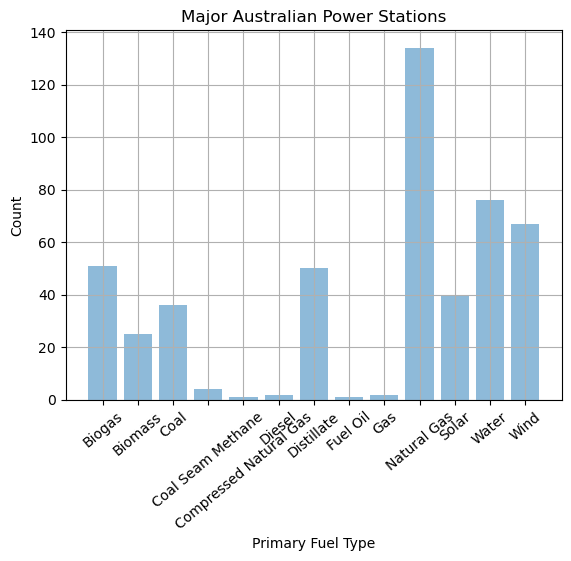

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

fuelTypeDistr = wrkData.groupby('fueltype').size().reset_index(name='numStations')

# Plot
plt.bar(fuelTypeDistr['fueltype'], fuelTypeDistr['numStations'], alpha=0.5, align='center')
plt.xticks(rotation=40)
plt.title('Major Australian Power Stations')
plt.xlabel('Primary Fuel Type')
plt.ylabel('Count')
plt.grid()

### (b) Histogram with Binning
Plot the number of generators per power station in bins of 10.

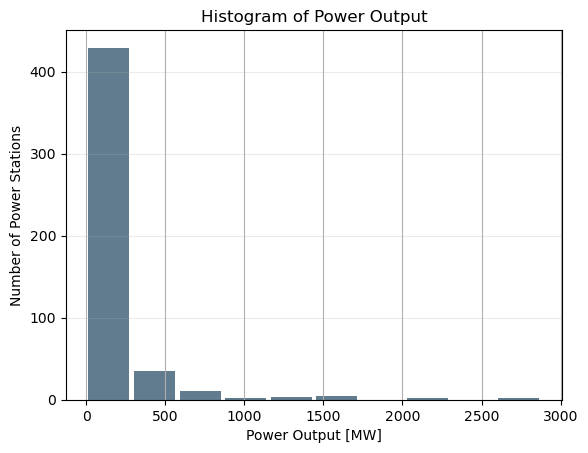

In [33]:
pyExpFreq = wrkData['power'].hist(bins=10, rwidth=0.9, color='#607c8e')
plt.title('Histogram of Power Output')
plt.xlabel('Power Output [MW]')
plt.ylabel('Number of Power Stations')
plt.grid(axis='y', alpha=0.25)

### (c) Scatter Plot for comparing power and size

Text(0, 0.5, 'Output [MW]')

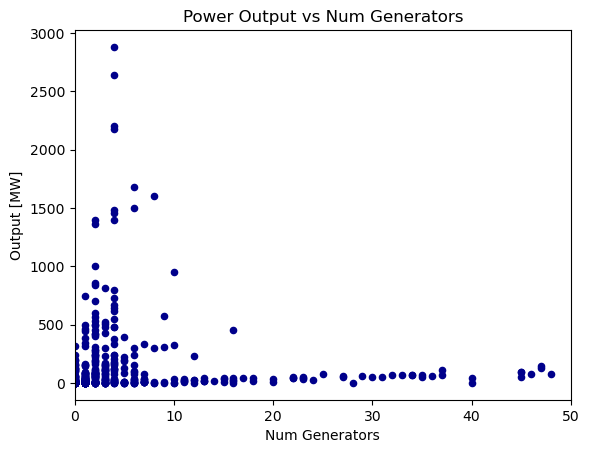

In [34]:
%matplotlib inline

fig = plt.figure()
sub = plt.subplot()
wrkData.plot.scatter(x='numGen', y='power', c='DarkBlue', ax=sub)
sub.set_xlim(0,50)
plt.title('Power Output vs Num Generators')
plt.xlabel('Num Generators')
plt.ylabel('Output [MW]')

Next we want to color code the data points in the scatter plot by station type. To be able to give colors per point, we need to create a numeric encoding of the fuel type.

In [35]:
# which fule types exist again?
wrkData['fueltype'].unique()

array(['Water', 'Natural Gas', 'Wind', 'Biogas', 'Coal', 'Distillate',
       'Gas', 'Biomass', 'Fuel Oil', 'Compressed Natural Gas',
       'Coal Seam Methane', 'Solar', 'Diesel'], dtype=object)

In [36]:
# What is the frequency distribution of the fuel types?
fuelTypeDistr = wrkData.groupby('fueltype').size()
print(fuelTypeDistr)

fueltype
Biogas                     51
Biomass                    25
Coal                       36
Coal Seam Methane           4
Compressed Natural Gas      1
Diesel                      2
Distillate                 50
Fuel Oil                    1
Gas                         2
Natural Gas               134
Solar                      40
Water                      76
Wind                       67
dtype: int64


In [37]:
# assign colors to some selected fuel types
# the numbers and the order chosen are up-to you.
# we have chosen an order that works well with the color schemes used in the subsequent plots
wrkData['fuelEncoding'] = wrkData['fueltype'].map({
    'Biogas': 1,
    'Wind': 2,
    'Solar': 3,
    'Water': 4,
    'Natural Gas': 5,
    'Coal Seam Methane': 6,
    'Coal': 7
})

Text(0, 0.5, 'Output [MW]')

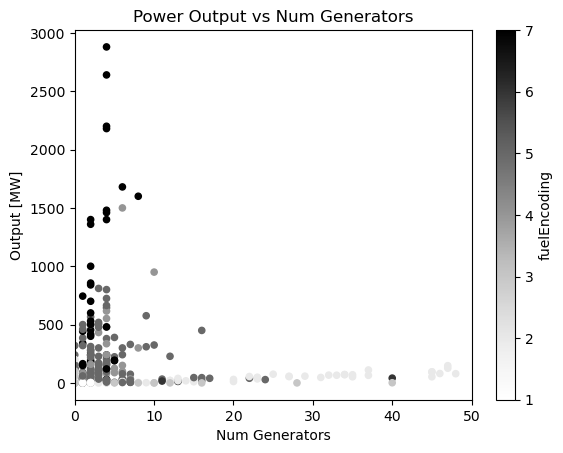

In [38]:
# Now we can use this encoding column to color our plot
%matplotlib inline

fig = plt.figure()
sub = plt.subplot()
wrkData.plot.scatter(x='numGen', y='power', c='fuelEncoding', ax=sub)
sub.set_xlim(0,50)
plt.title('Power Output vs Num Generators')
plt.xlabel('Num Generators')
plt.ylabel('Output [MW]')

The plot of the fuel types is more easier to interpret when we use colour. We can either define dedicated colour values, or use one of the pre-defined colour maps from Matplotlib. Choosing an appropriate colouring scheme helps quite a bit to see that coal or natural gas power stations have fewer generators, but a large output, vs. e.g. wind farms with a high number of generators, but lower overall output.

Text(0, 0.5, 'Output [MW]')

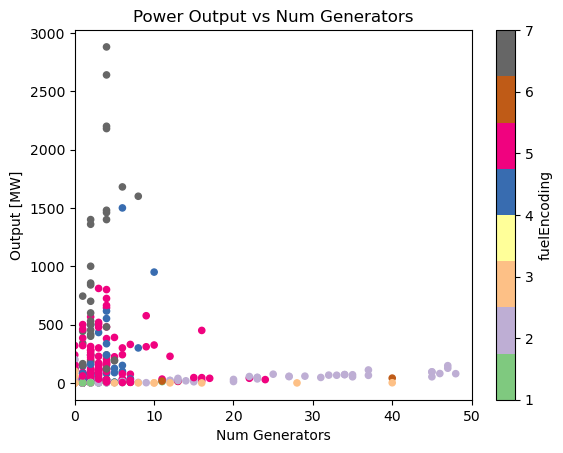

In [39]:
# the same plot as before, but using a more vivid color scheme (colormap='Accent')
# (for available colormaps from matplotlib, see https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
%matplotlib inline

fig = plt.figure()
sub = plt.subplot()
wrkData.plot.scatter(x='numGen',y='power',c='fuelEncoding',colormap='Accent',ax=sub)
sub.set_xlim(0,50)
plt.title('Power Output vs Num Generators')
plt.xlabel('Num Generators')
plt.ylabel('Output [MW]')

### (d) Boxplots for Likert-Scale
Visualise boxplots for {spConf}, the spatial confidence value on the GPS location of the stations.

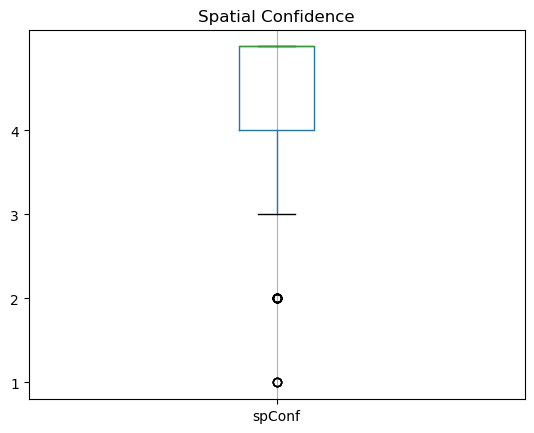

In [40]:
%matplotlib inline

plt.yticks(np.arange(1, 5, 1.0))
fig = wrkData.boxplot(['spConf']).set_title('Spatial Confidence')
plt.grid(axis='y', alpha=0) # disable grid lines

The boxplot shows that most entries have a high to very-high location confidence (4 or 5), but there are two outliers with very low confidence in thgeir location values.

## That's it for today